## Collections of code to process image

In [2]:
import os
import cv2
import numpy as np
import torch

In [16]:
data_root = "/data/zhanghm/chinese_preprocessed/training/10001/"

all_images = [img.path for img in os.scandir(data_root) if img.path.endswith(".jpg")]
print(len(all_images))

img_shape = []
for i, img_file in enumerate(all_images):
    img = cv2.imread(img_file)
    if i == 0:
        img_basename = os.path.basename(img_file)
        print(img_basename)
        img_save = cv2.resize(img, (64,64))
        cv2.imwrite("/data/zhanghm/mmlab/mmediting/dataset/"+img_basename, img_save)

    img_shape.append(np.array(img.shape))
img_shape_arr = np.asarray(img_shape)
print(img_shape_arr.shape)
print(np.max(img_shape_arr, axis=0))
print(np.min(img_shape_arr, axis=0))


1476
1189.jpg
(1476, 3)
[228 167   3]
[177 140   3]


## Convert RGB image to gray image in Pytorch

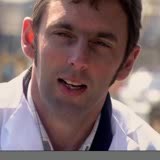

(3, 1, 160, 160)
torch.Size([3, 160, 160])
torch.Size([1, 160, 160])
(160, 160, 1)


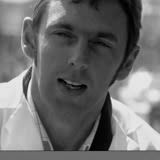

In [20]:
import torchvision
import torchvision.transforms as T
from PIL import Image
from IPython.display import display

img_path = "/data/zhanghm/LRS2/5535423430009926848/00001/000000.jpg"
img_src = cv2.imread(img_path)

display(Image.fromarray(img_src[..., ::-1]))

## 1) Convert to torch tensor
x = np.asarray([img_src]) / 255.
x = np.transpose(x, (3, 0, 1, 2)) # C x T x H x W
print(x.shape)

x_tensor = torch.FloatTensor(x)
x_tensor = x_tensor.squeeze(1)
print(x_tensor.shape)

transform_used = T.Compose([T.ToPILImage(), T.Grayscale(), T.ToTensor()])
gray_img = transform_used(x_tensor)
print(gray_img.shape)

gray_img = gray_img.numpy().transpose(1, 2, 0) * 255.
gray_img = gray_img.astype(np.uint8)
print(gray_img.shape)

display(Image.fromarray(gray_img[..., 0]))

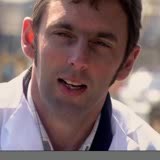

(2, 3, 160, 160)
torch.Size([2, 3, 160, 160])
torch.Size([160, 160])
torch.Size([160, 160])
torch.Size([160, 160])


In [32]:
import torchvision
import torchvision.transforms as T
from PIL import Image
from IPython.display import display

img_path = "/data/zhanghm/LRS2/5535423430009926848/00001/000000.jpg"
img_src = cv2.imread(img_path)

display(Image.fromarray(img_src[..., ::-1]))

## 1) Convert to torch tensor
x = np.asarray([img_src, img_src]) / 255.
x = np.transpose(x, (0, 3, 1, 2)) # C x T x H x W
print(x.shape)

x_tensor = torch.FloatTensor(x)
print(x_tensor.shape)

for i in range(3):
    print(b.shape)

x_tensor = x_tensor[0]

transform_used = T.Compose([T.ToPILImage(), T.Grayscale()])
gray_img = transform_used(x_tensor)
# print(gray_img.shape)

# gray_img = gray_img.numpy().transpose(1, 2, 0) * 255.
# gray_img = gray_img.astype(np.uint8)
# print(gray_img.shape)

# display(Image.fromarray(gray_img[..., 0]))

## Image Transforms

torch.Size([3, 512, 512]) <class 'torch.Tensor'> tensor(0.) tensor(0.9451)
(512, 512, 3) <class 'numpy.ndarray'> 0 241


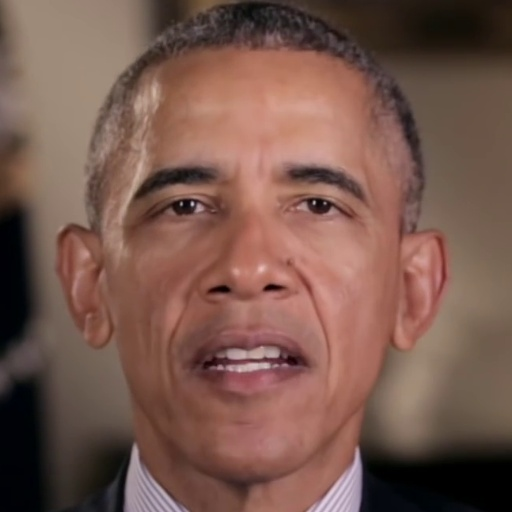

(512, 512, 3) <class 'numpy.ndarray'> 0 241


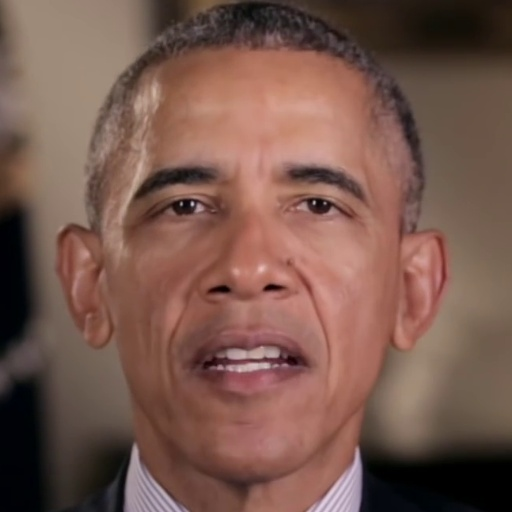

In [13]:
import torchvision
import torchvision.transforms as T
from PIL import Image
from IPython.display import display
import cv2
import numpy as np


img_path = "../../data/obama.jpg"

img = cv2.imread(img_path)

transforms = T.ToTensor()

img_tensor = transforms(img)
print(img_tensor.shape, type(img_tensor), img_tensor.min(), img_tensor.max())

img = np.array(T.ToPILImage()(img_tensor))
print(img.shape, type(img), img.min(), img.max())

display(Image.fromarray(img[..., ::-1]))

## Same with below
img = (img_tensor.permute(1, 2, 0) * 255).numpy().astype(np.uint8)
print(img.shape, type(img), img.min(), img.max())
display(Image.fromarray(img[..., ::-1]))
